# BNP Paribas PF
> Comment démasquer les fraudeurs ?


## Renommage des données

Les noms de variable proposés sont pas terribles...

Dans le panier, on compte le nombre de produits d'un type i donné.
C'est le libellé du produit qui donne le type.
Ce type sert de premier niveau d'aggrégat.
Exemple de type : `2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC`

Renommage des données ($1 \leq i \leq 24$)
- id : identifiant du panier
- category_i : une catégorie de produits dans le panier
- price_i : le prix d'un produit de type i
- manufacturer_i : fabriquant
- product_i : libellé du produit de type i
- product_code_i : code  du produit de type i
- product_count_i : nombre de produits d'une certain type dans le panier
- product_type_count : nombre de types de produit dans le panier, valeur comprise entre 1 et 24 et qui renseigne le nombre de colonnes significatives
- fraud : booléen indiquant s'il y a eu fraude ou non

## Aperçu des donnnées

In [1]:
from utils import *
x_train, y_train, df, x_test = get_data()
df.head()

,id,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,...,product_count_17,product_count_18,product_count_19,product_count_20,product_count_21,product_count_22,product_count_23,product_count_24,product_type_count,fraud
0,85517,COMPUTERS,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
2,83008,TELEVISIONS HOME CINEMA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
4,77846,TELEVISIONS HOME CINEMA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [2]:
x_train.head()

,id,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,...,product_count_16,product_count_17,product_count_18,product_count_19,product_count_20,product_count_21,product_count_22,product_count_23,product_count_24,product_type_count
0,85517,COMPUTERS,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,83008,TELEVISIONS HOME CINEMA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,77846,TELEVISIONS HOME CINEMA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
y_train.head()

,fraud
0,0
1,0
2,0
3,0
4,0


In [4]:
df.tail()

,id,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,...,product_count_17,product_count_18,product_count_19,product_count_20,product_count_21,product_count_22,product_count_23,product_count_24,product_type_count,fraud
92785,21243,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
92786,45891,COMPUTERS,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
92787,42613,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0
92788,43567,COMPUTERS,COMPUTERS,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
92789,68268,TELEVISIONS HOME CINEMA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [5]:
df.describe()

,id,price_1,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,...,product_count_17,product_count_18,product_count_19,product_count_20,product_count_21,product_count_22,product_count_23,product_count_24,product_type_count,fraud
count,92790.000000,92790.000000,44656.000000,12901.000000,4562.000000,2170.00000,1336.000000,946.000000,727.000000,568.000000,...,142.000000,120.000000,103.000000,91.000000,77.000000,63.000000,50.000000,43.000000,92790.000000,92790.000000
mean,57968.969070,1093.907124,191.608071,193.334548,176.132398,195.73871,162.015719,144.598309,130.957359,132.609155,...,1.436620,1.466667,1.388350,1.329670,1.220779,1.380952,1.160000,1.372093,1.764479,0.014215
std,33487.595782,711.172270,392.665621,375.676640,321.354938,374.22739,292.077355,291.432858,257.730692,267.234057,...,1.431484,1.810025,1.165122,0.869929,0.528737,0.923328,0.548095,1.113195,1.462264,0.118376
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28901.250000,649.000000,7.000000,7.000000,10.000000,16.00000,15.000000,20.000000,16.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,57961.500000,949.000000,40.000000,43.000000,48.000000,59.00000,50.000000,50.000000,45.000000,45.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,86985.750000,1349.000000,139.000000,189.000000,189.000000,199.00000,179.250000,140.000000,120.000000,129.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,2.000000,0.000000
max,115985.000000,21995.000000,6499.000000,5999.000000,5198.000000,4249.00000,2997.000000,4198.000000,2999.000000,2399.000000,...,12.000000,16.000000,7.000000,7.000000,4.000000,7.000000,4.000000,8.000000,60.000000,1.000000


In [7]:
# Nombre de valeurs nan par colonnes
df.isna().sum()

id                        0
category_1                0
category_2            48134
category_3            79889
category_4            88228
                      ...  
product_count_22      92727
product_count_23      92740
product_count_24      92747
product_type_count        0
fraud                     0
Length: 147, dtype: int64

## Analyse des valeurs des données

In [8]:
# Libellés des différentes catégories de produits
categories = distinct_values_for('category_', df)
print('Nombre de catégories distinctes: ', len(categories))
print('Extrait des valeurs: \n', categories[:10])

Nombre de catégories distinctes:  174
Extrait des valeurs: 
 ['SOFT FURNISHINGS', 'BARWARE', 'TARGUS GEOLITE ESSENTIAL CASE', 'WOMEN S NIGHTWEAR', 'BAGS & CARRY CASES', 'MEN S NIGHTWEAR', 'LOGITECH PEBBLE M350 BLUETOOTH MOUSE', 'BABY FEEDING', 'LUGGAGE', 'AUDIO ACCESSORIES']


In [10]:
# Nombre de catégories dans le panier
# <= product_type_count  car plusieurs produits différents peuvent appartenir à la même catégorie
# product_type_count : nombre de types de produit dans le panier,
# valeur comprise entre 1 et 24 et qui renseigne le nombre de colonnes significatives

In [11]:
# Libellés des différents fabriquants des produits
manufacturers = distinct_values_for('manufacturer_', df)
print('Nombre de fabriquants des produits distincts: ', len(manufacturers))
print('Extrait des valeurs: \n', manufacturers[:10])

Nombre de fabriquants des produits distincts:  830
Extrait des valeurs: 
 ['BODY CLOCK HEALTH CARE LTD', 'HUSH', 'FENELLA SMITH', 'TRUE GRACE', 'BLUEBELLGRAY', 'MEACO', 'RUSSEL', 'PAUL LAMOND', 'TKC', 'HABICO']


In [12]:
# Libellés des différents produits
products = distinct_values_for('product_', df)
print('Nombre de produits distincts: ', len(products))
print('Extrait des valeurs: \n', products[:10])

Nombre de produits distincts:  9680
Extrait des valeurs: 
 ['GOOCH LUXURY DISTRESSED WATERFALL RUG L120 X W180', 'RETAILER FUSION KIWI BIRD', 'RETAILER MITCH TOUCH LAMPS SILVER SET O', 'RETAILER EMPIRE CRYSTAL CHANDELIER CEIL', 'JOSEPH JOSEPH PRESTO SOAP PUMP GREY', 'RETAILER COSY MEDIUM 2 SEATER SOFA LIGH', 'RETAILER CHEVRON GARDEN SINGLE CHAIR PO', 'JOSEPH JOSEPH FLEX TOILET BRUSH STEEL', 'SWOON EVESHAM MEDIUM 2 SEATER SOFA DARK LEG FERN V', 'PHILIPS HUE PLAY GRADIENT SMART LIGHTING ADJUSTABL']


In [13]:
# Codes des différents produits
product_codes = distinct_values_for('product_code_', df)
print('Nombre de catégories distinctes: ', len(product_codes))
print('Extrait des valeurs: \n', product_codes[:10])

Nombre de catégories distinctes:  14385
Extrait des valeurs: 
 ['240108576', '240241799', '238707926', '231482396', '233054818', '241016865', '239091986', '240243888', '237718697', '238825453']


> Bizarre on s'attendrait à ce que len(product) == len(product_code)


> Pourquoi le max de `product_type_count` est 60 et pas 24? (nombre de types de produit dans le panier, valeur comprise entre 1 et 24 et qui renseigne le nombre de colonnes significatives)

In [13]:
# 1 <= product_type_count <= 24 ?
print('max de product_type_count : ',
        max(df.product_type_count))
print('Nombre de fois où product_type_count>24 : ',
        df.query('product_type_count>24').product_type_count.sum())

max de product_type_count :  60.0
Nombre de fois où product_type_count>24 :  1281.0


## Distributions
### Distribution des prix non nuls

In [14]:

s = transform_prefixed_columns_in_series('price_', df)
min(s), max(s)

(0.0, 21995.0)

<AxesSubplot:ylabel='Density'>

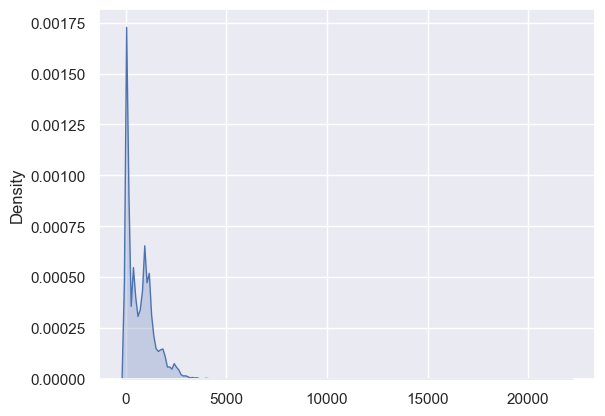

In [15]:
import seaborn as sns
sns.set()
# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
sns.kdeplot(s, shade=True)

### Distribution des quantités de produits non nulles

In [16]:
s = transform_prefixed_columns_in_series('product_count_', df)
min(s), max(s), len(s)

(1.0, 40.0, 163357)

In [17]:
s[s==1].sum()

157909.0

In [18]:
for i in range(1,11):
    print(i, s[s==i].sum())

1 157909.0
2 8436.0
3 1266.0
4 1896.0
5 285.0
6 948.0
7 133.0
8 376.0
9 72.0
10 120.0


<AxesSubplot:ylabel='Density'>

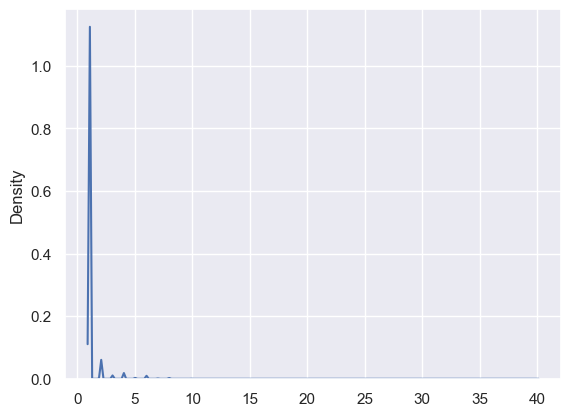

In [20]:
sns.kdeplot(s)